## Welcome to the Code!

# In the machine learning cases, we generally encounter two main categories of data and corresponding machine learning models:

- Supervised data: This type of data always includes one or more target variables associated with it.
- Unsupervised data: This type of data lacks any target variable.

A supervised problem is typically more straightforward to address compared to an unsupervised problem. A supervised problem involves predicting a value based on the provided data. For instance, if the task involves forecasting house prices using historical price data along with features like the presence of nearby amenities (e.g., hospitals, schools, supermarkets), proximity to public transportation, and so on, it falls under the category of a supervised problem. Similarly, when we are given images of cats and dogs and already know which ones are cats and which ones are dogs, and the objective is to build a model that can determine whether a given image is of a cat or a dog, we are dealing with a supervised problem.

In this dataset, we are addressing a <b>Supervised Machine Learning Problem</b> related to predicting heart failure.

# Importing all the libraries needed

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
matplotlib.style.use('ggplot')

# Background

Cardiovascular diseases (CVDs) are a leading global cause of death, responsible for approximately 17.9 million fatalities each year, constituting 31% of all worldwide deaths. Of these CVD-related deaths, four out of five result from heart attacks and strokes, with a significant portion occurring prematurely among individuals under 70 years old. Heart failure is a frequent outcome stemming from CVDs, and this dataset includes 11 characteristics that can be utilized to forecast potential heart disease.

Individuals with cardiovascular disease or those at high risk for it (due to factors such as hypertension, diabetes, hyperlipidaemia, or existing medical conditions) require early detection and effective management. In this context, machine learning models can offer valuable assistance.

In [2]:
# !wget https://raw.githubusercontent.com/gsi-bioinformatics/Workshop-ML-GSI/main/heart.csv

In [3]:
df=pd.read_csv("./heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

Showing all the dataframe

In [4]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
5     57    1   0     140   192    0        1       148     0      0.4    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
7     44    1   1     120   263    0        1       173     0      0.0    2   
8     52    1   2     172   199    1        1       162     0      0.5    2   
9     57    1   2     150   168    0        1       174     0      1.6    2   
10    54    1   0     140   239    0        1       160     0      1.2    2   
11    48    0   2     130   275    0        1       139     0      0.2    2   
12    49    1   1     130   266    0        1       171     0      0.6    2   
13    64    1   3     110   211    0        0       144     1      1.8    1   
14    58    0   3     150   283    1        0       162     0      1.0    2   
15    50    0   2     120   219    0        1       158     0      1.6    1   
16    58    0   2     120   340    0        1       172     0      0.0    2   
17    66    0   3     150   226    0        1       114     0      2.6    0   
18    43    1   0     150   247    0        1       171     0      1.5    2   
19    69    0   3     140   239    0        1       151     0      1.8    2   
20    59    1   0     135   234    0        1       161     0      0.5    1   
21    44    1   2     130   233    0        1       179     1      0.4    2   
22    42    1   0     140   226    0        1       178     0      0.0    2   
23    61    1   2     150   243    1        1       137     1      1.0    1   
24    40    1   3     140   199    0        1       178     1      1.4    2   
25    71    0   1     160   302    0        1       162     0      0.4    2   
26    59    1   2     150   212    1        1       157     0      1.6    2   
27    51    1   2     110   175    0        1       123     0      0.6    2   
28    65    0   2     140   417    1        0       157     0      0.8    2   
29    53    1   2     130   197    1        0       152     0      1.2    0   
30    41    0   1     105   198    0        1       168     0      0.0    2   
31    65    1   0     120   177    0        1       140     0      0.4    2   
32    44    1   1     130   219    0        0       188     0      0.0    2   
33    54    1   2     125   273    0        0       152     0      0.5    0   
34    51    1   3     125   213    0        0       125     1      1.4    2   
35    46    0   2     142   177    0        0       160     1      1.4    0   
36    54    0   2     135   304    1        1       170     0      0.0    2   
37    54    1   2     150   232    0        0       165     0      1.6    2   
38    65    0   2     155   269    0        1       148     0      0.8    2   
39    65    0   2     160   360    0        0       151     0      0.8    2   
40    51    0   2     140   308    0        0       142     0      1.5    2   
41    48    1   1     130   245    0        0       180     0      0.2    1   
42    45    1   0     104   208    0        0       148     1      3.0    1   
43    53    0   0     130   264    0        0       143     0      0.4    1   
44    39    1   2     140   321    0        0       182     0      0.0    2   
45    52    1   1     120   325    0        1       172     0      0.2    2   
46    44    1   2     140   235    0        0       180     0      0.0    2   
47    47    1   2     138   257    0        0       156     0      0.0    2   
48    53    0   2     128   216    0        0       115     0      0.0    2   
49    53    0   0     138   234    0        0       160

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

- int64 (Integer 64-bit):

    int64 stands for "integer 64-bit."
    It is a data type used to represent whole numbers, also known as integers.
    The "64-bit" part refers to the number of bits used to store each integer value. In this case, it uses 64 bits, which allows it to represent a wide range of integer values, including both positive and negative numbers.
    int64 is commonly used for counting, indexing, and representing discrete quantities in Python.
    
    
- float64 (Floating-Point 64-bit):

    float64 stands for "floating-point 64-bit."
    It is a data type used to represent real numbers, including both integers and decimal fractions.
    The "64-bit" part refers to the number of bits used to store each floating-point value. It provides a high level of precision for numeric calculations.
    float64 is commonly used for scientific and mathematical calculations where high precision is required, such as in machine learning algorithms or scientific simulations.

In [6]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

# The Attributess include:
- age : age of the patient [years]
- sex: sex of the patient
    - 1: Male
    - 0: Female
- cp : chest pain type

    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    
- trtbps: resting blood pressure [mm Hg]
- chol : serum cholesterol [mm/dl]
- fbs : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- restecg : resting electrocardiogram results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- exng : exercise-induced angina [Y: Yes, N: No]
- oldpeak : oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis

## First Question should be why do we need this ??

Out Come of this phase is as given below :

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [7]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

In [8]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df,
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [9]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [10]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [11]:
fig=px.histogram(df,
                 x="restecg",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

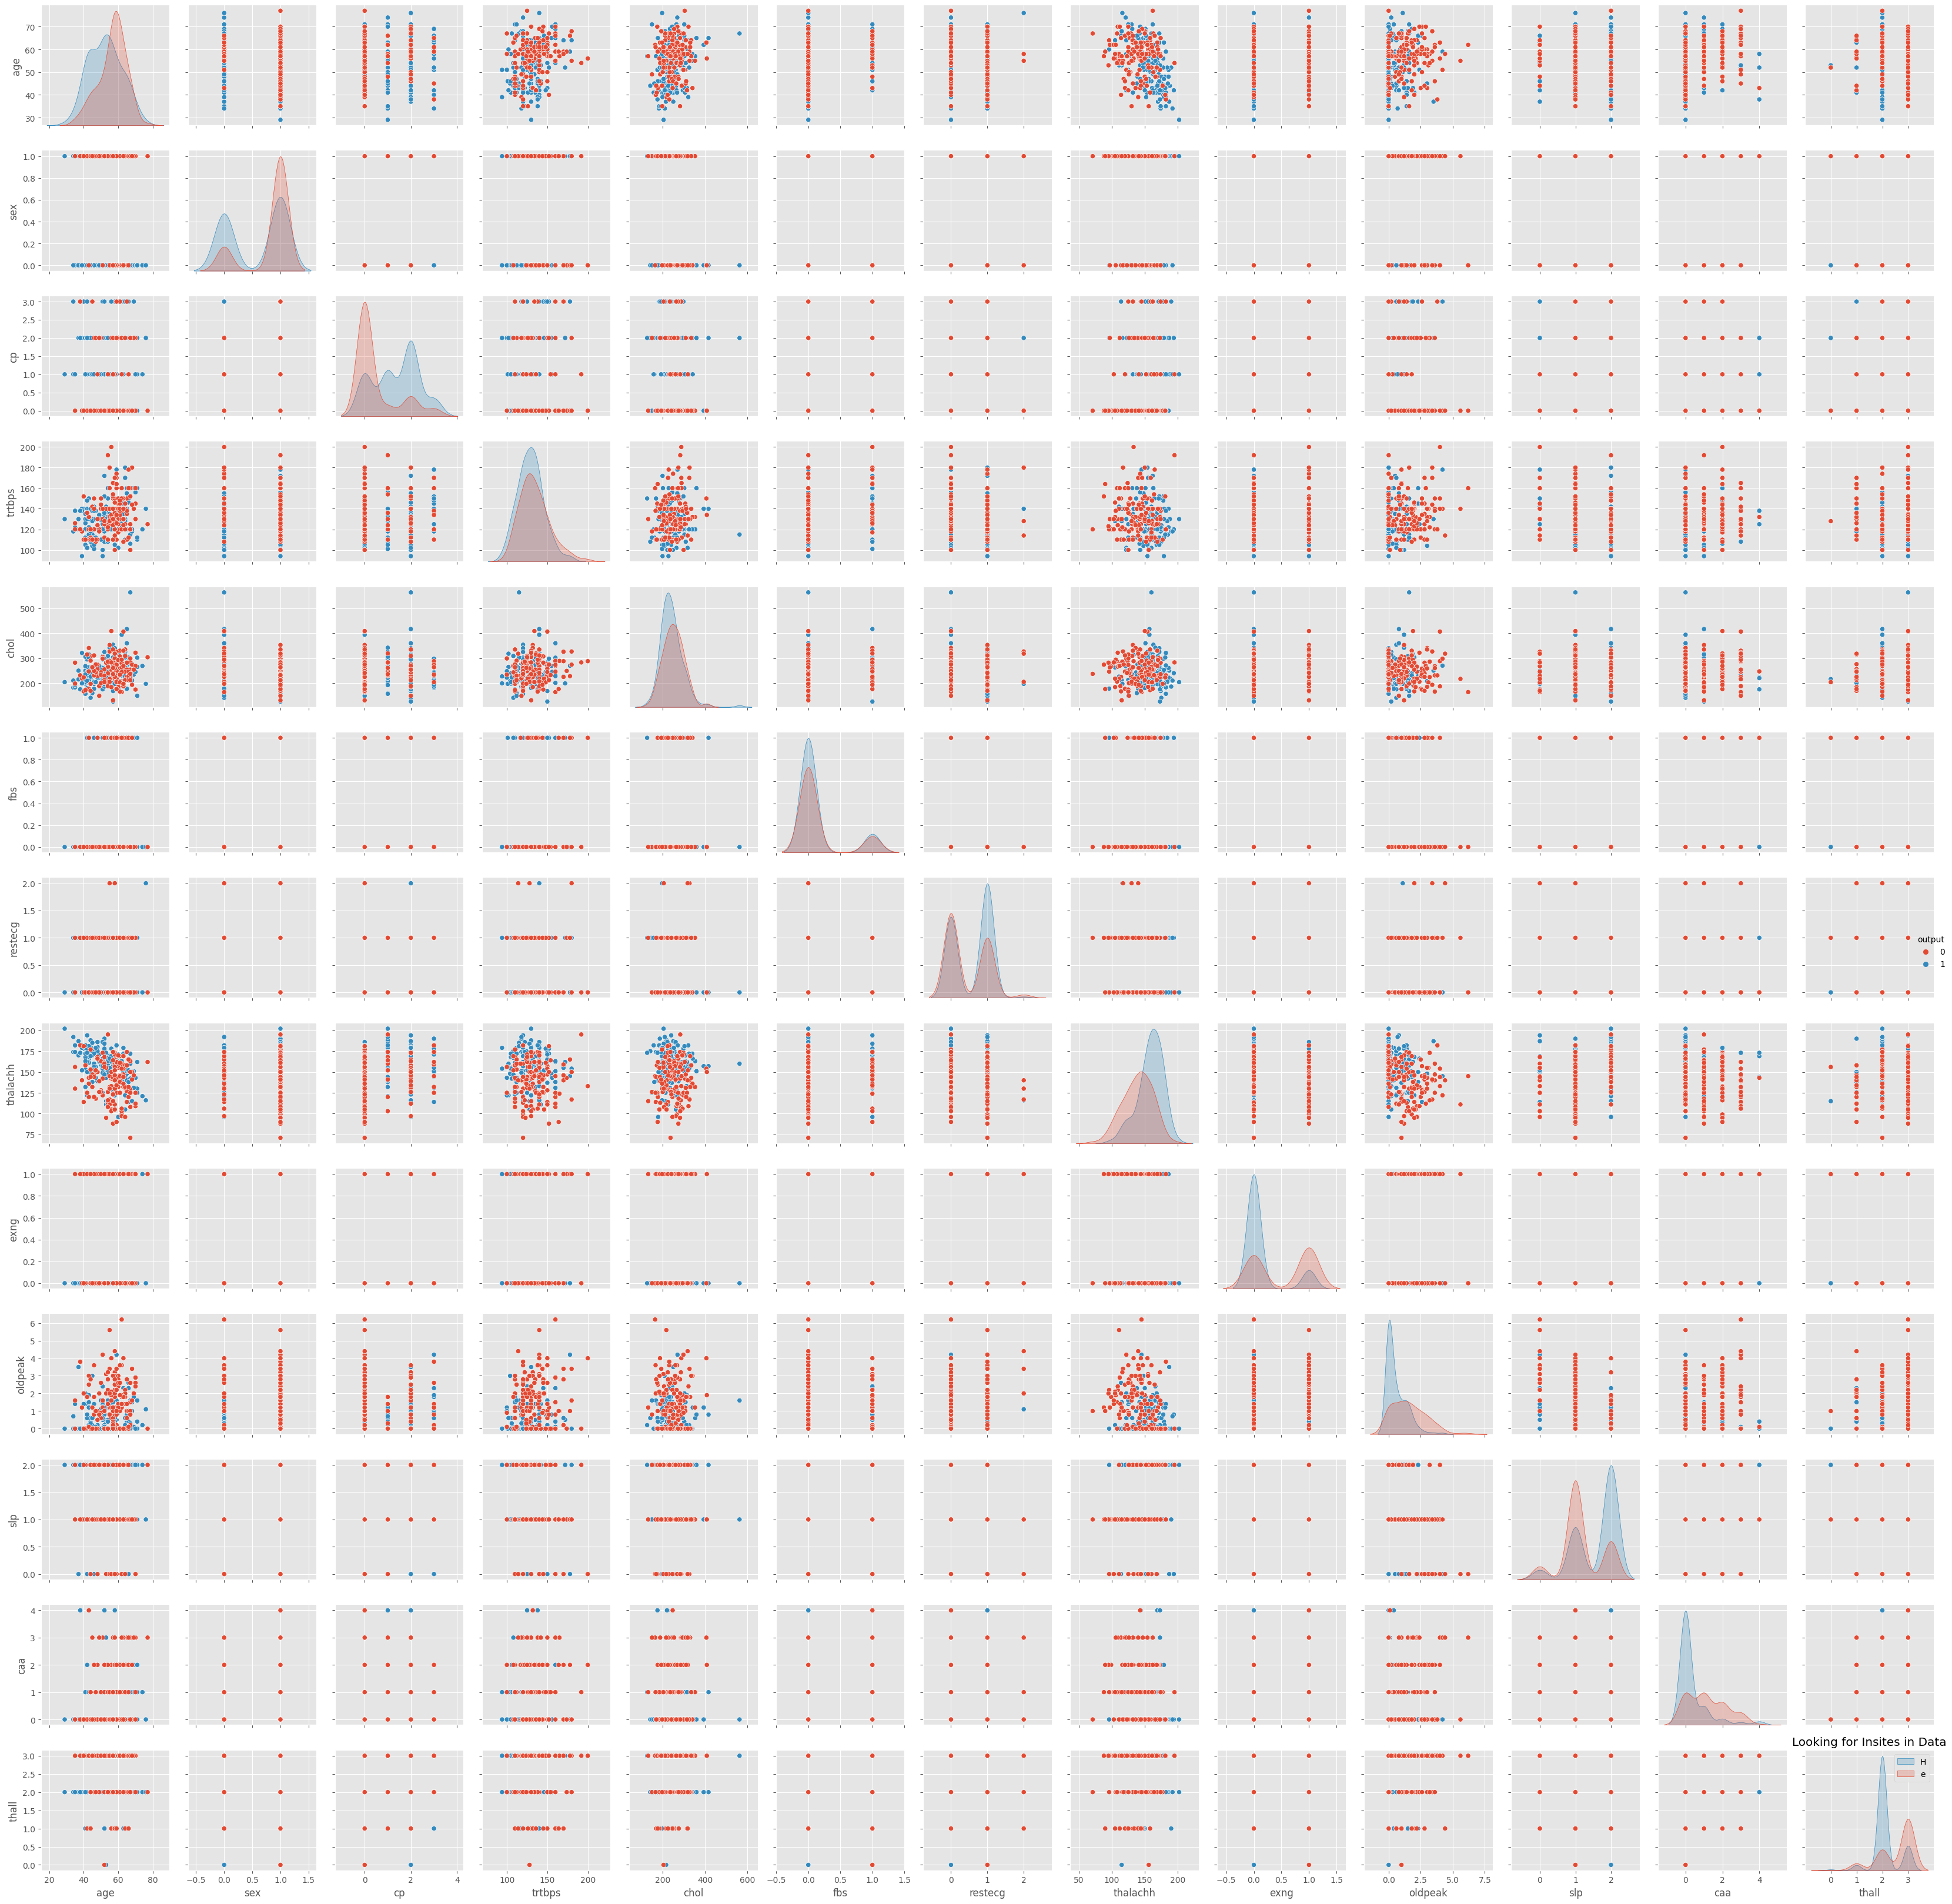

In [12]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

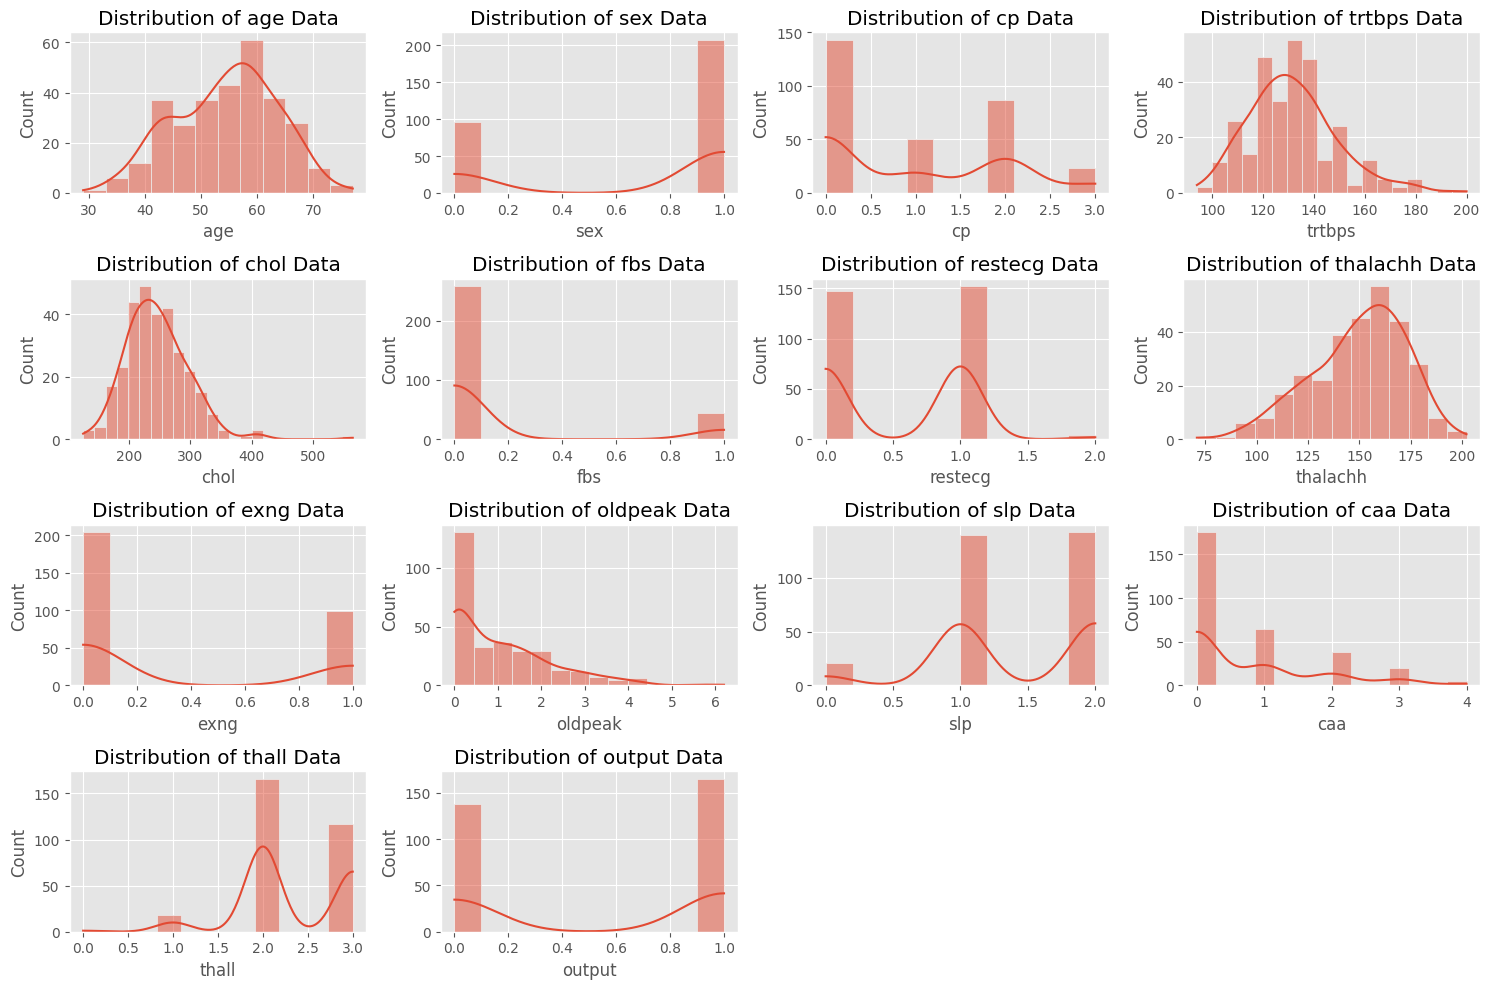

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [14]:
fig = px.box(df,y="age",x="output",title=f"Distrubution of Age")
fig.show()

In [15]:
fig = px.box(df,y="trtbps",x="output",title=f"Distrubution of RestingBP",color="sex")
fig.show()

In [16]:
fig = px.box(df,y="chol",x="output",title=f"Distrubution of Cholesterol")
fig.show()

In [17]:
fig = px.box(df,y="oldpeak",x="output",title=f"Distrubution of Oldpeak")
fig.show()

In [18]:
fig = px.box(df,y="thalachh",x="output",title=f"Distrubution of MaxHR")
fig.show()

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.


# Handling Null Values :
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.


In [19]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
# Checking for NULLs in the data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization :

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

## The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.

# Training our Machine Learning Model :


## Using SVM(Support Vector Machines):

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

<img src="https://monkeylearn.com/static/93a102a9b7b96d9047212e15b627724b/d8712/image4-3.webp" width=40%>

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:

<img src="https://monkeylearn.com/static/e662f65502ffd24d3ee23c07efe88d9e/d8712/image3-2.webp" width=40%>

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:

<img src="https://monkeylearn.com/static/5db2d9178789315ce9fa42f579c895a6/93a24/image2-3.webp" width=40%>

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this

<img src="https://monkeylearn.com/static/583405ebadf21c9691030ec4bb875e48/93a24/image6-2.webp" width=40%>

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.
- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score, accuracy_score, roc_curve
from sklearn.svm import SVC

y = df['output']
X = df.drop(['output'],axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

ro_scaler = MinMaxScaler()
X_train   = ro_scaler.fit_transform(X_train)
X_valid   = ro_scaler.transform(X_valid)

## Linear Kernel

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy Score: 0.8852459016393442
ROC AUC Score: 0.8841594827586207


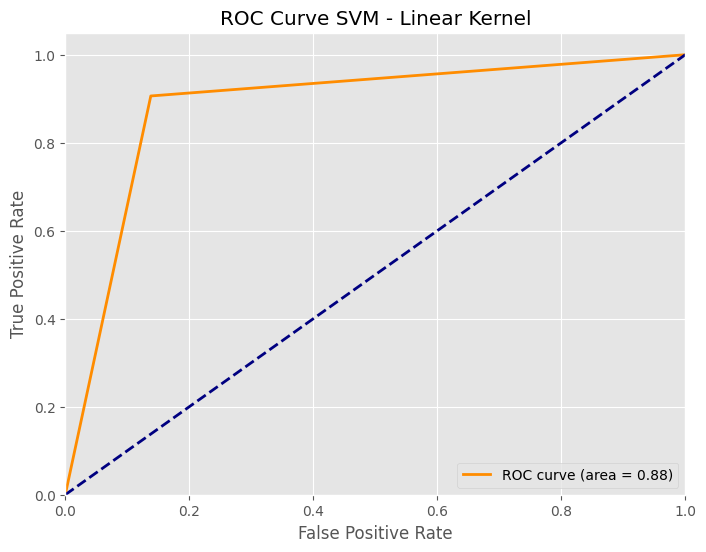

In [22]:
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)

print("Classification Report:")
print(classification_report(y_valid, y_pred))

acc = accuracy_score(y_valid, y_pred)  # Calculate accuracy
print("Accuracy Score:", acc)

roc_auc = roc_auc_score(y_valid, y_pred)  # Calculate ROC AUC score
print("ROC AUC Score:", roc_auc)


# Plot ROC curve

fpr, tpr, _ = roc_curve(y_valid, y_pred, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM - Linear Kernel')
plt.legend(loc='lower right')
plt.show()

## Sigmoid Kernel

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Accuracy Score: 0.7704918032786885
ROC AUC Score: 0.7699353448275862


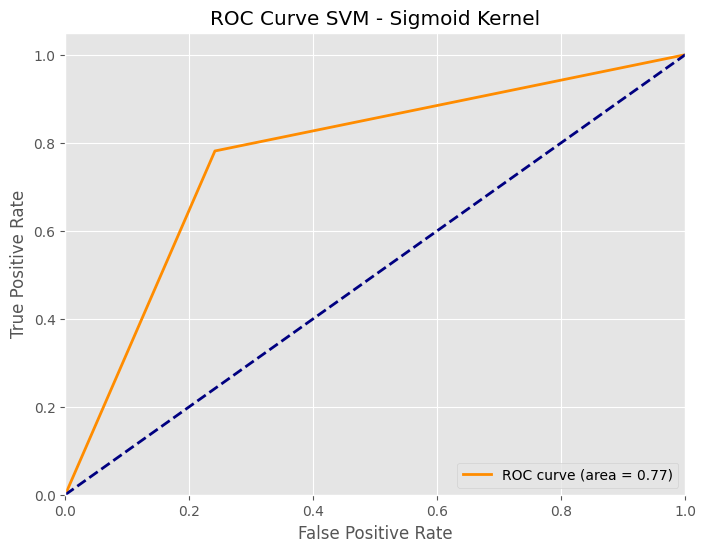

In [23]:
clf=SVC(kernel="sigmoid")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)

print("Classification Report:")
print(classification_report(y_valid, y_pred))

acc = accuracy_score(y_valid, y_pred)  # Calculate accuracy
print("Accuracy Score:", acc)

roc_auc = roc_auc_score(y_valid, y_pred)  # Calculate ROC AUC score
print("ROC AUC Score:", roc_auc)


# Plot ROC curve

fpr, tpr, _ = roc_curve(y_valid, y_pred, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM - Sigmoid Kernel')
plt.legend(loc='lower right')
plt.show()

## RBF Kernel

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy Score: 0.8360655737704918
ROC AUC Score: 0.8372844827586207


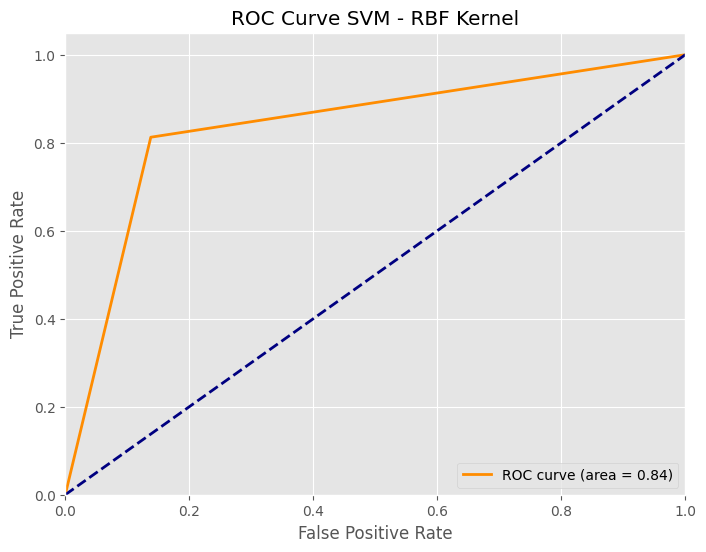

In [24]:
clf=SVC(kernel="rbf")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)

print("Classification Report:")
print(classification_report(y_valid, y_pred))

acc = accuracy_score(y_valid, y_pred)  # Calculate accuracy
print("Accuracy Score:", acc)

roc_auc = roc_auc_score(y_valid, y_pred)  # Calculate ROC AUC score
print("ROC AUC Score:", roc_auc)


# Plot ROC curve

fpr, tpr, _ = roc_curve(y_valid, y_pred, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM - RBF Kernel')
plt.legend(loc='lower right')
plt.show()

# Choosing the best Evaluation Matrix:

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):
    - If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
    - AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about

- Log loss
    > Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem

- **Mcro averaged precision**: calculate precision for all classes individually and then average them
- **Micro averaged precision**: calculate class wise true positive and false positive and then use that to calculate overall precision
- **Weighted precision**: same as macro but in this case, it is weighted average depending on the number of items in each class

<img src="https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png">
